#1 데이터 및 라이브러리 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1월 초 주가 움직임: 코스피

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA2023-1/kospi_data.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


In [ ]:
data['Close_lag'] = data['Close'].shift(1) #이 칼럼을 뒤로 한칸씩 민다
data['Log_Rate'] = np.log(data['Close']/data['Close_lag'])
data

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667
...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857


In [ ]:
data['Month'] = [x.month for x in data['Date']]
data['Day'] = [x.day for x in data['Date']]
data['Year'] = [x.year for x in data['Date']]
data

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981
...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022


In [ ]:
first_days = list(data[data['Month']==1].groupby('Year')['Date'].min())
first_days

[Timestamp('1982-01-04 00:00:00'),
 Timestamp('1983-01-04 00:00:00'),
 Timestamp('1984-01-04 00:00:00'),
 Timestamp('1985-01-04 00:00:00'),
 Timestamp('1986-01-04 00:00:00'),
 Timestamp('1987-01-05 00:00:00'),
 Timestamp('1988-01-04 00:00:00'),
 Timestamp('1989-01-04 00:00:00'),
 Timestamp('1990-01-03 00:00:00'),
 Timestamp('1991-01-03 00:00:00'),
 Timestamp('1992-01-03 00:00:00'),
 Timestamp('1993-01-04 00:00:00'),
 Timestamp('1994-01-03 00:00:00'),
 Timestamp('1995-01-03 00:00:00'),
 Timestamp('1996-01-03 00:00:00'),
 Timestamp('1997-01-03 00:00:00'),
 Timestamp('1998-01-03 00:00:00'),
 Timestamp('1999-01-04 00:00:00'),
 Timestamp('2000-01-04 00:00:00'),
 Timestamp('2001-01-02 00:00:00'),
 Timestamp('2002-01-02 00:00:00'),
 Timestamp('2003-01-02 00:00:00'),
 Timestamp('2004-01-02 00:00:00'),
 Timestamp('2005-01-03 00:00:00'),
 Timestamp('2006-01-02 00:00:00'),
 Timestamp('2007-01-02 00:00:00'),
 Timestamp('2008-01-02 00:00:00'),
 Timestamp('2009-01-02 00:00:00'),
 Timestamp('2010-01-

In [ ]:
df = data[(data['Month'] == 1) | (data['Date'].isin(first_days) == True)]
df

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year
195,1982-01-04,123.60,123.60,123.60,123.60,413000.0,-0.0586,131.30,-0.060434,1,4,1982
196,1982-01-05,121.66,121.66,121.66,121.66,697000.0,-0.0157,123.60,-0.015820,1,5,1982
197,1982-01-06,125.80,125.80,125.80,125.80,1180000.0,0.0340,121.66,0.033463,1,6,1982
198,1982-01-07,126.66,126.66,126.66,126.66,1860000.0,0.0068,125.80,0.006813,1,7,1982
199,1982-01-08,126.74,126.74,126.74,126.74,1410000.0,0.0006,126.66,0.000631,1,8,1982
...,...,...,...,...,...,...,...,...,...,...,...,...
10875,2022-01-24,2792.00,2823.76,2828.11,2780.68,473990000.0,-0.0149,2834.29,-0.015033,1,24,2022
10876,2022-01-25,2720.39,2786.41,2789.62,2703.99,639960000.0,-0.0256,2792.00,-0.025983,1,25,2022
10877,2022-01-26,2709.24,2729.75,2744.14,2708.10,472650000.0,-0.0041,2720.39,-0.004107,1,26,2022
10878,2022-01-27,2614.49,2709.24,2722.86,2614.49,487730000.0,-0.0350,2709.24,-0.035599,1,27,2022


In [ ]:
temp = []
for i, x in enumerate(df['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Change'])))

print(temp)
print(len(temp))
df['Jan'] = temp
df

[100, 98.42999999999999, 101.77662, 102.46870101599998, 102.53018223660958, 104.53977380844714, 104.30978630606856, 102.2444525372084, 101.64121026723888, 101.6107179041587, 100.35074500214714, 101.80583080467827, 102.44720753874773, 101.74032180673038, 101.60805938838163, 101.98400920811865, 101.6882555814151, 101.90180091813608, 101.99351253896239, 102.47288204789551, 102.02200136688478, 101.36906055813672, 101.67316773981112, 101.65283310626316, 100, 100.03, 100.23006, 98.82683916, 98.52047595860401, 98.51062391100815, 97.64373042059128, 97.96595473097923, 98.42639471821482, 99.02679572599594, 98.64059122266455, 99.04501764667748, 98.91625912373681, 97.92709653249943, 97.31994853399794, 97.02798868839595, 97.04739428613362, 96.57186205413157, 95.86688746113641, 96.15448812351981, 95.52948395071694, 95.76830766059372, 96.64937609107119, 96.5237319021528, 100, 100.0, 100.0, 100.0, 100.0, 100.0, 102.37, 102.830665, 102.89236339899999, 102.52195089076359, 102.96279527959388, 102.3244259

<ipython-input-165-2834b82ddb33>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jan'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Jan
195,1982-01-04,123.60,123.60,123.60,123.60,413000.0,-0.0586,131.30,-0.060434,1,4,1982,100.000000
196,1982-01-05,121.66,121.66,121.66,121.66,697000.0,-0.0157,123.60,-0.015820,1,5,1982,98.430000
197,1982-01-06,125.80,125.80,125.80,125.80,1180000.0,0.0340,121.66,0.033463,1,6,1982,101.776620
198,1982-01-07,126.66,126.66,126.66,126.66,1860000.0,0.0068,125.80,0.006813,1,7,1982,102.468701
199,1982-01-08,126.74,126.74,126.74,126.74,1410000.0,0.0006,126.66,0.000631,1,8,1982,102.530182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10875,2022-01-24,2792.00,2823.76,2828.11,2780.68,473990000.0,-0.0149,2834.29,-0.015033,1,24,2022,93.427673
10876,2022-01-25,2720.39,2786.41,2789.62,2703.99,639960000.0,-0.0256,2792.00,-0.025983,1,25,2022,91.035924
10877,2022-01-26,2709.24,2729.75,2744.14,2708.10,472650000.0,-0.0041,2720.39,-0.004107,1,26,2022,90.662677
10878,2022-01-27,2614.49,2709.24,2722.86,2614.49,487730000.0,-0.0350,2709.24,-0.035599,1,27,2022,87.489483


In [ ]:
temp = []
for i in np.arange(1982, 2023):
  # print(i)
  for j in np.arange(len(df[df['Year']==i])):
    temp.append(j)
df['Jan_num'] = temp
df

<ipython-input-166-77249da5e440>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jan_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Jan,Jan_num
195,1982-01-04,123.60,123.60,123.60,123.60,413000.0,-0.0586,131.30,-0.060434,1,4,1982,100.000000,0
196,1982-01-05,121.66,121.66,121.66,121.66,697000.0,-0.0157,123.60,-0.015820,1,5,1982,98.430000,1
197,1982-01-06,125.80,125.80,125.80,125.80,1180000.0,0.0340,121.66,0.033463,1,6,1982,101.776620,2
198,1982-01-07,126.66,126.66,126.66,126.66,1860000.0,0.0068,125.80,0.006813,1,7,1982,102.468701,3
199,1982-01-08,126.74,126.74,126.74,126.74,1410000.0,0.0006,126.66,0.000631,1,8,1982,102.530182,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10875,2022-01-24,2792.00,2823.76,2828.11,2780.68,473990000.0,-0.0149,2834.29,-0.015033,1,24,2022,93.427673,15
10876,2022-01-25,2720.39,2786.41,2789.62,2703.99,639960000.0,-0.0256,2792.00,-0.025983,1,25,2022,91.035924,16
10877,2022-01-26,2709.24,2729.75,2744.14,2708.10,472650000.0,-0.0041,2720.39,-0.004107,1,26,2022,90.662677,17
10878,2022-01-27,2614.49,2709.24,2722.86,2614.49,487730000.0,-0.0350,2709.24,-0.035599,1,27,2022,87.489483,18


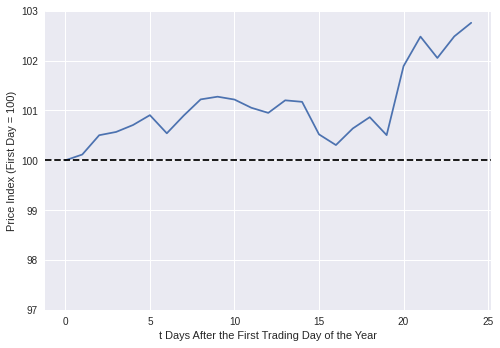

In [ ]:
df1 = pd.DataFrame(df.groupby('Jan_num')['Jan'].mean()).reset_index()
plt.plot(df1['Jan_num'], df1['Jan'])
plt.xlabel('t Days After the First Trading Day of the Year')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(97, 103)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

# 1월 초 주가 움직임: 코스닥

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA2023-1/kosdaq_data.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [ ]:
data['Close_lag'] = data['Close'].shift(1) #이 칼럼을 뒤로 한칸씩 민다
data['Log_Rate'] = np.log(data['Close']/data['Close_lag'])
data

,Date,Close,Change,Fluctuation,Open,High,Low,Volume,Transaction,Market_cap,Close_lag,Log_Rate
6671,1996-07-01,1000.00,NaN,NaN,1000.00,1000.00,1000.00,119,1074.0,NaN,NaN,NaN
6670,1996-07-02,1001.70,NaN,NaN,1001.70,1001.70,1001.70,143,1534.0,NaN,1000.00,0.001699
6669,1996-07-03,1005.30,NaN,NaN,1005.30,1005.30,1005.30,115,1013.0,NaN,1001.70,0.003587
6668,1996-07-04,1018.40,NaN,NaN,1018.40,1018.40,1018.40,235,5248.0,NaN,1005.30,0.012947
6667,1996-07-05,1037.80,NaN,NaN,1037.80,1037.80,1037.80,60,895.0,NaN,1018.40,0.018870
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-01-13,711.82,1.00,0.14,712.24,714.75,709.26,1082282,5228817.0,331000000.0,710.82,0.001406
3,2023-01-16,716.89,5.07,0.71,714.71,718.15,713.19,1230666,5646744.0,333000000.0,711.82,0.007097
2,2023-01-17,709.71,-7.18,-1.00,716.70,718.90,708.54,1162083,6282539.0,330000000.0,716.89,-0.010066
1,2023-01-18,711.75,2.04,0.29,711.12,713.28,708.79,1175236,6534155.0,331000000.0,709.71,0.002870


In [ ]:
data['Month'] = [x.month for x in data['Date']]
data['Day'] = [x.day for x in data['Date']]
data['Year'] = [x.year for x in data['Date']]
data

,Date,Close,Change,Fluctuation,Open,High,Low,Volume,Transaction,Market_cap,Close_lag,Log_Rate,Month,Day,Year
6671,1996-07-01,1000.00,NaN,NaN,1000.00,1000.00,1000.00,119,1074.0,NaN,NaN,NaN,7,1,1996
6670,1996-07-02,1001.70,NaN,NaN,1001.70,1001.70,1001.70,143,1534.0,NaN,1000.00,0.001699,7,2,1996
6669,1996-07-03,1005.30,NaN,NaN,1005.30,1005.30,1005.30,115,1013.0,NaN,1001.70,0.003587,7,3,1996
6668,1996-07-04,1018.40,NaN,NaN,1018.40,1018.40,1018.40,235,5248.0,NaN,1005.30,0.012947,7,4,1996
6667,1996-07-05,1037.80,NaN,NaN,1037.80,1037.80,1037.80,60,895.0,NaN,1018.40,0.018870,7,5,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-01-13,711.82,1.00,0.14,712.24,714.75,709.26,1082282,5228817.0,331000000.0,710.82,0.001406,1,13,2023
3,2023-01-16,716.89,5.07,0.71,714.71,718.15,713.19,1230666,5646744.0,333000000.0,711.82,0.007097,1,16,2023
2,2023-01-17,709.71,-7.18,-1.00,716.70,718.90,708.54,1162083,6282539.0,330000000.0,716.89,-0.010066,1,17,2023
1,2023-01-18,711.75,2.04,0.29,711.12,713.28,708.79,1175236,6534155.0,331000000.0,709.71,0.002870,1,18,2023


In [ ]:
first_days = list(data[data['Month']==1].groupby('Year')['Date'].min())
first_days

[Timestamp('1997-01-03 00:00:00'),
 Timestamp('1998-01-03 00:00:00'),
 Timestamp('1999-01-04 00:00:00'),
 Timestamp('2000-01-04 00:00:00'),
 Timestamp('2001-01-02 00:00:00'),
 Timestamp('2002-01-02 00:00:00'),
 Timestamp('2003-01-02 00:00:00'),
 Timestamp('2004-01-02 00:00:00'),
 Timestamp('2005-01-03 00:00:00'),
 Timestamp('2006-01-02 00:00:00'),
 Timestamp('2007-01-02 00:00:00'),
 Timestamp('2008-01-02 00:00:00'),
 Timestamp('2009-01-02 00:00:00'),
 Timestamp('2010-01-04 00:00:00'),
 Timestamp('2011-01-03 00:00:00'),
 Timestamp('2012-01-02 00:00:00'),
 Timestamp('2013-01-02 00:00:00'),
 Timestamp('2014-01-02 00:00:00'),
 Timestamp('2015-01-02 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2018-01-02 00:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2021-01-04 00:00:00'),
 Timestamp('2022-01-03 00:00:00'),
 Timestamp('2023-01-02 00:00:00')]

In [ ]:
df = data[(data['Month'] == 1) | (data['Date'].isin(first_days) == True)]
df

,Date,Close,Change,Fluctuation,Open,High,Low,Volume,Transaction,Market_cap,Close_lag,Log_Rate,Month,Day,Year
6524,1997-01-03,1195.10,-9.60,-0.80,1204.70,1204.70,1191.50,9,145.0,7295360.0,1204.70,-0.008001,1,3,1997
6523,1997-01-04,1189.00,-6.10,-0.51,1195.10,1195.40,1182.40,214,3225.0,7262317.0,1195.10,-0.005117,1,4,1997
6522,1997-01-06,1173.50,-15.50,-1.30,1189.00,1189.80,1173.40,37,740.0,7168008.0,1189.00,-0.013122,1,6,1997
6521,1997-01-07,1157.00,-16.50,-1.41,1173.50,1175.00,1156.70,238,5233.0,7185927.0,1173.50,-0.014160,1,7,1997
6520,1997-01-08,1151.50,-5.50,-0.48,1157.00,1159.60,1147.30,87,1041.0,7161982.0,1157.00,-0.004765,1,8,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-01-13,711.82,1.00,0.14,712.24,714.75,709.26,1082282,5228817.0,331000000.0,710.82,0.001406,1,13,2023
3,2023-01-16,716.89,5.07,0.71,714.71,718.15,713.19,1230666,5646744.0,333000000.0,711.82,0.007097,1,16,2023
2,2023-01-17,709.71,-7.18,-1.00,716.70,718.90,708.54,1162083,6282539.0,330000000.0,716.89,-0.010066,1,17,2023
1,2023-01-18,711.75,2.04,0.29,711.12,713.28,708.79,1175236,6534155.0,331000000.0,709.71,0.002870,1,18,2023


In [ ]:
temp = []
for i, x in enumerate(df['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Log_Rate'])))

print(temp)
print(len(temp))
df['Jan'] = temp
df

[100, 99.48827538179467, 98.1828020315737, 96.79250526859646, 96.33128821314278, 97.2637217553764, 97.79763494033406, 98.44795409070514, 98.23860608919824, 98.54762470109564, 98.6980791191764, 98.9153286191084, 99.55734042353683, 99.20539928623755, 100.36960006511231, 100.27755240342594, 99.73240483020406, 99.50632061177764, 99.36403119438725, 100.00597917560121, 99.83018491757846, 99.75488242360377, 100.0805379603437, 100.48952450675547, 101.02337896798326, 100, 99.16308962421846, 97.9667992497682, 97.91597341244153, 97.7837713199318, 96.89561069028532, 98.18770590377963, 98.89642618156533, 99.089295844691, 98.71262677795455, 100.39506875725043, 99.41499928998587, 100.10341547786912, 101.81565972132285, 101.62249000591191, 101.0725172805011, 99.57860594492746, 100.04468492700289, 101.00486253192808, 101.21789953283225, 103.75512343707734, 104.68494374104812, 100, 97.77650977481123, 98.19435874310868, 97.18156219193129, 97.88559054043289, 99.70049919649252, 100.32648215040919, 100.9914

<ipython-input-97-88889539ac5a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jan'] = temp


,Date,Close,Change,Fluctuation,Open,High,Low,Volume,Transaction,Market_cap,Close_lag,Log_Rate,Month,Day,Year,Jan
6524,1997-01-03,1195.10,-9.60,-0.80,1204.70,1204.70,1191.50,9,145.0,7295360.0,1204.70,-0.008001,1,3,1997,100.000000
6523,1997-01-04,1189.00,-6.10,-0.51,1195.10,1195.40,1182.40,214,3225.0,7262317.0,1195.10,-0.005117,1,4,1997,99.488275
6522,1997-01-06,1173.50,-15.50,-1.30,1189.00,1189.80,1173.40,37,740.0,7168008.0,1189.00,-0.013122,1,6,1997,98.182802
6521,1997-01-07,1157.00,-16.50,-1.41,1173.50,1175.00,1156.70,238,5233.0,7185927.0,1173.50,-0.014160,1,7,1997,96.792505
6520,1997-01-08,1151.50,-5.50,-0.48,1157.00,1159.60,1147.30,87,1041.0,7161982.0,1157.00,-0.004765,1,8,1997,96.331288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-01-13,711.82,1.00,0.14,712.24,714.75,709.26,1082282,5228817.0,331000000.0,710.82,0.001406,1,13,2023,105.942746
3,2023-01-16,716.89,5.07,0.71,714.71,718.15,713.19,1230666,5646744.0,333000000.0,711.82,0.007097,1,16,2023,106.694658
2,2023-01-17,709.71,-7.18,-1.00,716.70,718.90,708.54,1162083,6282539.0,330000000.0,716.89,-0.010066,1,17,2023,105.620672
1,2023-01-18,711.75,2.04,0.29,711.12,713.28,708.79,1175236,6534155.0,331000000.0,709.71,0.002870,1,18,2023,105.923834


In [ ]:
temp = []
for i in np.arange(1997, 2024):
  # print(i)
  for j in np.arange(len(df[df['Year']==i])):
    temp.append(j)
df['Jan_num'] = temp
df

<ipython-input-98-b845e8f320fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jan_num'] = temp


,Date,Close,Change,Fluctuation,Open,High,Low,Volume,Transaction,Market_cap,Close_lag,Log_Rate,Month,Day,Year,Jan,Jan_num
6524,1997-01-03,1195.10,-9.60,-0.80,1204.70,1204.70,1191.50,9,145.0,7295360.0,1204.70,-0.008001,1,3,1997,100.000000,0
6523,1997-01-04,1189.00,-6.10,-0.51,1195.10,1195.40,1182.40,214,3225.0,7262317.0,1195.10,-0.005117,1,4,1997,99.488275,1
6522,1997-01-06,1173.50,-15.50,-1.30,1189.00,1189.80,1173.40,37,740.0,7168008.0,1189.00,-0.013122,1,6,1997,98.182802,2
6521,1997-01-07,1157.00,-16.50,-1.41,1173.50,1175.00,1156.70,238,5233.0,7185927.0,1173.50,-0.014160,1,7,1997,96.792505,3
6520,1997-01-08,1151.50,-5.50,-0.48,1157.00,1159.60,1147.30,87,1041.0,7161982.0,1157.00,-0.004765,1,8,1997,96.331288,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-01-13,711.82,1.00,0.14,712.24,714.75,709.26,1082282,5228817.0,331000000.0,710.82,0.001406,1,13,2023,105.942746,9
3,2023-01-16,716.89,5.07,0.71,714.71,718.15,713.19,1230666,5646744.0,333000000.0,711.82,0.007097,1,16,2023,106.694658,10
2,2023-01-17,709.71,-7.18,-1.00,716.70,718.90,708.54,1162083,6282539.0,330000000.0,716.89,-0.010066,1,17,2023,105.620672,11
1,2023-01-18,711.75,2.04,0.29,711.12,713.28,708.79,1175236,6534155.0,331000000.0,709.71,0.002870,1,18,2023,105.923834,12


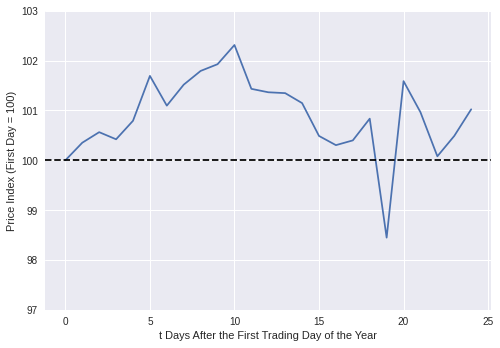

In [ ]:
df2 = pd.DataFrame(df.groupby('Jan_num')['Jan'].mean()).reset_index()
plt.plot(df2['Jan_num'], df2['Jan'])
plt.xlabel('t Days After the First Trading Day of the Year')
plt.ylabel('Price Index (First Day = 100)')
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.ylim(97, 103)
plt.show()

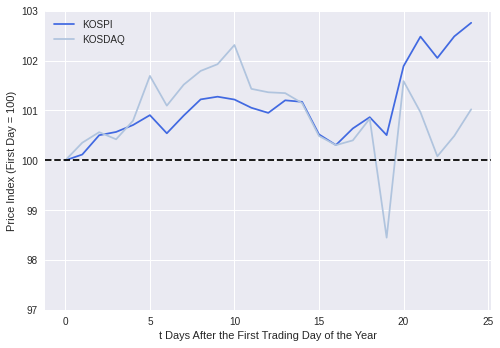

In [ ]:
plt.plot(df1['Jan_num'], df1['Jan'], label = 'KOSPI', color = 'royalblue')
plt.plot(df2['Jan_num'], df2['Jan'], label = 'KOSDAQ', color = 'lightsteelblue')
plt.xlabel('t Days After the First Trading Day of the Year')
plt.ylabel('Price Index (First Day = 100)')
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.ylim(97, 103)
plt.legend()
plt.show()

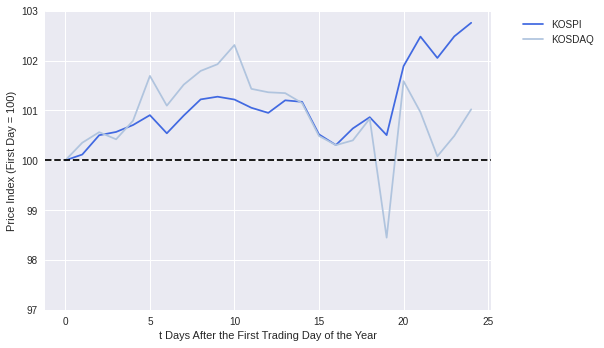

In [ ]:
plt.plot(df1['Jan_num'], df1['Jan'], label = 'KOSPI', color = 'royalblue')
plt.plot(df2['Jan_num'], df2['Jan'], label = 'KOSDAQ', color = 'lightsteelblue')
plt.xlabel('t Days After the First Trading Day of the Year')
plt.ylabel('Price Index (First Day = 100)')
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.ylim(97, 103)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

#경기 호/불황에 따른 서머랠리 비교

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA2023-1/kospi_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Close_lag'] = data['Close'].shift(1) #이 칼럼을 뒤로 한칸씩 민다
data['Log_Rate'] = np.log(data['Close']/data['Close_lag'])
data['Month'] = [x.month for x in data['Date']]
data['Day'] = [x.day for x in data['Date']]
data['Year'] = [x.year for x in data['Date']]
data

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981
...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022


In [ ]:
data_temp = pd.DataFrame(data.groupby('Year')['Log_Rate'].sum()).reset_index()
data_temp.columns = ['Year', 'Year_Rate']
data1 = pd.merge(data, data_temp, on = 'Year', how = 'left')
data1

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981,0.060434
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981,0.060434
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981,0.060434
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981,0.060434
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981,0.060434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022,-0.186087
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022,-0.186087
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022,-0.186087
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022,-0.186087


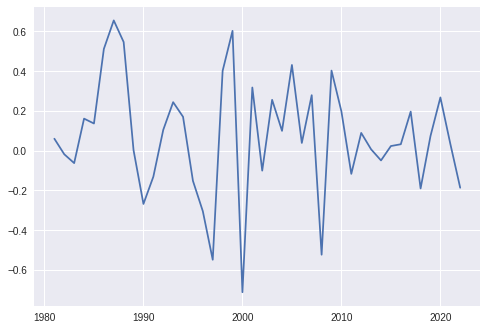

In [ ]:
plt.plot(data_temp['Year'], data_temp['Year_Rate'])

In [ ]:
data1_up = data1[data1['Year_Rate'] >= np.mean(data1['Year_Rate'])]
data1_down = data1[data1['Year_Rate'] <= np.mean(data1['Year_Rate'])]

In [ ]:
df_up = pd.DataFrame(data1_up.groupby('Month')['Log_Rate'].sum()).reset_index()
df_down = pd.DataFrame(data1_down.groupby('Month')['Log_Rate'].sum()).reset_index()

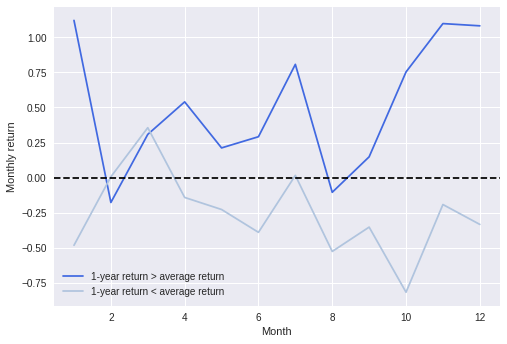

In [ ]:
plt.plot(df_up['Month'], df_up['Log_Rate'], label = '1-year return > average return', color = 'royalblue')
plt.plot(df_down['Month'], df_down['Log_Rate'], label = '1-year return < average return', color = 'lightsteelblue')
plt.ylabel('Monthly return')
plt.xlabel('Month')
plt.grid(visible=True, axis = 'y')
plt.axhline(0, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

##7월 첫날 주가 100으로 인덱스, 1년 수익 굿

In [ ]:
first_days = list(data1_up[data1_up['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1984-07-02 00:00:00'),
 Timestamp('1985-07-01 00:00:00'),
 Timestamp('1986-07-01 00:00:00'),
 Timestamp('1987-07-01 00:00:00'),
 Timestamp('1988-07-01 00:00:00'),
 Timestamp('1992-07-01 00:00:00'),
 Timestamp('1993-07-01 00:00:00'),
 Timestamp('1994-07-01 00:00:00'),
 Timestamp('1998-07-01 00:00:00'),
 Timestamp('1999-07-01 00:00:00'),
 Timestamp('2001-07-02 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2005-07-01 00:00:00'),
 Timestamp('2007-07-02 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2012-07-02 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2020-07-01 00:00:00')]

In [ ]:
df_up = data1_up[(data1_up['Month'] == 7) | (data1_up['Date'].isin(first_days) == True)]
df_up

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate
934,1984-07-02,130.28,130.28,130.28,130.28,1340000.0,0.0000,130.28,0.000000,7,2,1984,0.161537
935,1984-07-03,130.65,130.65,130.65,130.65,1310000.0,0.0028,130.28,0.002836,7,3,1984,0.161537
936,1984-07-04,132.19,132.19,132.19,132.19,1340000.0,0.0118,130.65,0.011718,7,4,1984,0.161537
937,1984-07-05,130.22,130.22,130.22,130.22,1170000.0,-0.0149,132.19,-0.015015,7,5,1984,0.161537
938,1984-07-06,132.54,132.54,132.54,132.54,2360000.0,0.0178,130.22,0.017659,7,6,1984,0.161537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10505,2020-07-27,2217.86,2203.48,2231.25,2203.48,928620000.0,0.0079,2200.44,0.007885,7,27,2020,0.268123
10506,2020-07-28,2256.99,2238.19,2266.00,2237.21,866720000.0,0.0176,2217.86,0.017489,7,28,2020,0.268123
10507,2020-07-29,2263.16,2258.35,2276.79,2252.24,899490000.0,0.0027,2256.99,0.002730,7,29,2020,0.268123
10508,2020-07-30,2267.01,2275.33,2281.33,2263.81,713040000.0,0.0017,2263.16,0.001700,7,30,2020,0.268123


In [ ]:
temp = []
for i, x in enumerate(df_up['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Change'])))

print(temp)
print(len(temp))
df_up['July'] = temp
df_up

[100, 100.27999999999999, 101.463304, 99.95150077039999, 101.73063748411312, 103.16503947263911, 102.37066866869978, 101.8178670578888, 101.40041380295148, 100.79201132013377, 101.81001063446712, 101.85073463872091, 100.79148699847822, 101.25512783867121, 101.91328616962257, 102.3617046287689, 102.77115144728398, 103.81941719204627, 103.653306124539, 103.6118448020892, 103.9641250744163, 103.86016094934189, 103.4966503860192, 103.5897973713666, 103.2790279792525, 100, 100.03999999999999, 99.15964799999999, 98.89191695039999, 98.5952411995488, 98.3980507171497, 98.18157500557197, 98.26012026557642, 98.22081621747019, 99.24231270613187, 99.17284308723757, 99.82738385161333, 99.66766003745074, 98.9699864171886, 98.59390046880327, 99.09672936119418, 99.08681968825806, 98.90846341281919, 99.17551626403379, 99.38378484818826, 99.4632918760668, 99.60254048469331, 99.59258023064484, 100.03078758365967, 100.07079989869314, 100.41104061834871, 100, 101.6, 102.89031999999999, 103.96037932799999, 

<ipython-input-210-ef82f13be904>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate,July
934,1984-07-02,130.28,130.28,130.28,130.28,1340000.0,0.0000,130.28,0.000000,7,2,1984,0.161537,100.000000
935,1984-07-03,130.65,130.65,130.65,130.65,1310000.0,0.0028,130.28,0.002836,7,3,1984,0.161537,100.280000
936,1984-07-04,132.19,132.19,132.19,132.19,1340000.0,0.0118,130.65,0.011718,7,4,1984,0.161537,101.463304
937,1984-07-05,130.22,130.22,130.22,130.22,1170000.0,-0.0149,132.19,-0.015015,7,5,1984,0.161537,99.951501
938,1984-07-06,132.54,132.54,132.54,132.54,2360000.0,0.0178,130.22,0.017659,7,6,1984,0.161537,101.730637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10505,2020-07-27,2217.86,2203.48,2231.25,2203.48,928620000.0,0.0079,2200.44,0.007885,7,27,2020,0.268123,105.288006
10506,2020-07-28,2256.99,2238.19,2266.00,2237.21,866720000.0,0.0176,2217.86,0.017489,7,28,2020,0.268123,107.141075
10507,2020-07-29,2263.16,2258.35,2276.79,2252.24,899490000.0,0.0027,2256.99,0.002730,7,29,2020,0.268123,107.430356
10508,2020-07-30,2267.01,2275.33,2281.33,2263.81,713040000.0,0.0017,2263.16,0.001700,7,30,2020,0.268123,107.612987


In [ ]:
temp = []
for i in df_up['Year'].unique():
  # print(i)
  for j in np.arange(len(df_up[df_up['Year']==i])):
    temp.append(j)
df_up['July_num'] = temp
df_up

<ipython-input-211-54cb57226797>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate,July,July_num
934,1984-07-02,130.28,130.28,130.28,130.28,1340000.0,0.0000,130.28,0.000000,7,2,1984,0.161537,100.000000,0
935,1984-07-03,130.65,130.65,130.65,130.65,1310000.0,0.0028,130.28,0.002836,7,3,1984,0.161537,100.280000,1
936,1984-07-04,132.19,132.19,132.19,132.19,1340000.0,0.0118,130.65,0.011718,7,4,1984,0.161537,101.463304,2
937,1984-07-05,130.22,130.22,130.22,130.22,1170000.0,-0.0149,132.19,-0.015015,7,5,1984,0.161537,99.951501,3
938,1984-07-06,132.54,132.54,132.54,132.54,2360000.0,0.0178,130.22,0.017659,7,6,1984,0.161537,101.730637,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10505,2020-07-27,2217.86,2203.48,2231.25,2203.48,928620000.0,0.0079,2200.44,0.007885,7,27,2020,0.268123,105.288006,18
10506,2020-07-28,2256.99,2238.19,2266.00,2237.21,866720000.0,0.0176,2217.86,0.017489,7,28,2020,0.268123,107.141075,19
10507,2020-07-29,2263.16,2258.35,2276.79,2252.24,899490000.0,0.0027,2256.99,0.002730,7,29,2020,0.268123,107.430356,20
10508,2020-07-30,2267.01,2275.33,2281.33,2263.81,713040000.0,0.0017,2263.16,0.001700,7,30,2020,0.268123,107.612987,21


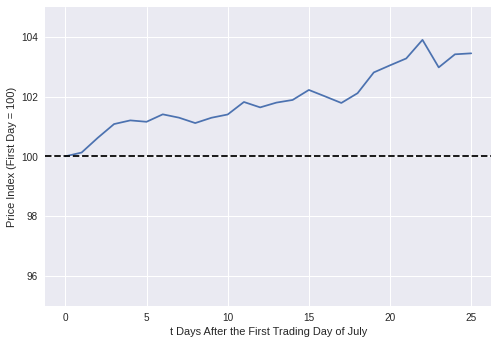

In [ ]:
df1 = pd.DataFrame(df_up.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df1['July_num'], df1['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

##7월 첫날 주가 100으로 인덱스, 1년 수익 배드

In [ ]:
first_days = list(data1_down[data1_down['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1981-07-01 00:00:00'),
 Timestamp('1982-07-01 00:00:00'),
 Timestamp('1983-07-01 00:00:00'),
 Timestamp('1989-07-01 00:00:00'),
 Timestamp('1990-07-02 00:00:00'),
 Timestamp('1991-07-01 00:00:00'),
 Timestamp('1995-07-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('2000-07-03 00:00:00'),
 Timestamp('2002-07-02 00:00:00'),
 Timestamp('2006-07-03 00:00:00'),
 Timestamp('2008-07-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00')]

In [ ]:
df_down = data1_down[(data1_down['Month'] == 7) | (data1_down['Date'].isin(first_days) == True)]
df_down

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,0.060434
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,0.060434
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,0.060434
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,0.060434
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,0.060434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,-0.186087
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,-0.186087
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,-0.186087
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,-0.186087


In [ ]:
temp = []
for i, x in enumerate(df_down['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Change'])))

print(temp)
print(len(temp))
df_down['July'] = temp
df_down

[100, 99.1, 99.54594999999999, 100.889820325, 102.86726080337, 106.0664326143548, 104.2739099031722, 104.72228771575584, 102.22989726812085, 102.48547201129115, 101.20440361115001, 99.60537403409384, 99.09738662651996, 99.67215146895379, 101.46625019539495, 99.22384606607673, 99.41237137360228, 97.8814208544488, 95.90421615318894, 94.49442417573705, 95.514963956835, 93.91986405875585, 92.323226369757, 93.02488289016715, 94.29932378576244, 94.68595101328407, 100, 102.51999999999998, 101.80236, 98.73810896399999, 96.09192764376479, 98.28282359404263, 97.93883371146349, 97.8996581779789, 98.18356718669503, 98.60575652559781, 98.83254976560669, 99.37612878931753, 99.4854425309858, 100.46039986778946, 100.26952510804067, 99.26682985696026, 98.76056902468976, 99.75805077183912, 100.26681683077551, 100.86841773176016, 100.86841773176016, 100.89867825707968, 102.01865358573328, 102.03905731645042, 102.94720492656683, 103.15309933641996, 100, 99.67, 99.101881, 99.46855795970001, 99.727176210395

<ipython-input-215-406e7b396ad6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate,July
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,0.060434,100.000000
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,0.060434,99.100000
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,0.060434,99.545950
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,0.060434,100.889820
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,0.060434,102.867261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,-0.186087,104.254148
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,-0.186087,104.660739
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,-0.186087,104.775866
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,-0.186087,105.635028


In [ ]:
temp = []
for i in df_down['Year'].unique():
  # print(i)
  for j in np.arange(len(df_down[df_down['Year']==i])):
    temp.append(j)
df_down['July_num'] = temp
df_down

<ipython-input-216-3470d03ad51e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate,July,July_num
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,0.060434,100.000000,0
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,0.060434,99.100000,1
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,0.060434,99.545950,2
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,0.060434,100.889820,3
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,0.060434,102.867261,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,-0.186087,104.254148,16
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,-0.186087,104.660739,17
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,-0.186087,104.775866,18
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,-0.186087,105.635028,19


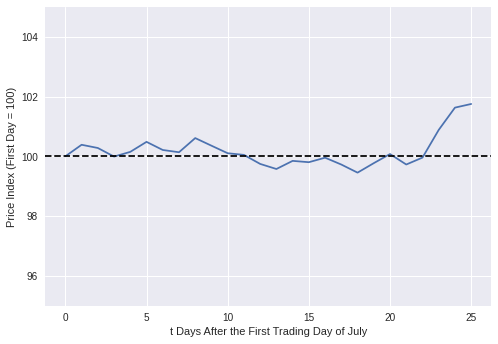

In [ ]:
df2 = pd.DataFrame(df_down.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df2['July_num'], df2['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

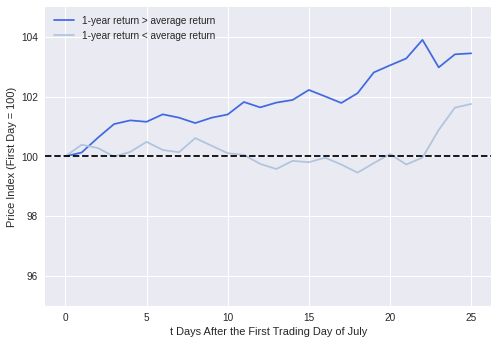

In [ ]:
plt.plot(df1['July_num'], df1['July'],label = '1-year return > average return', color = 'royalblue')
plt.plot(df2['July_num'], df2['July'], label = '1-year return < average return', color = 'lightsteelblue')
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

##첫 6개월의 수익률이 좋았을 때 서머랠리가 더 잘 나타날까

In [ ]:
data

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981
...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022


In [ ]:
data['Half'] = data['Month'] <= 6

In [ ]:
data_temp = pd.DataFrame(data.groupby(['Year', 'Half'])['Log_Rate'].sum()).reset_index()
data_temp.columns = ['Year', 'Half', 'Half_Rate']
data1 = pd.merge(data, data_temp, on = ['Year', 'Half'], how = 'left')
data1

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981,True,0.198904
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981,True,0.198904
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981,True,0.198904
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981,True,0.198904
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981,True,0.198904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022,False,0.058047
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022,False,0.058047
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022,False,0.058047
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022,False,0.058047


In [ ]:
data1_up = data1[data1['Half_Rate'] >= np.mean(data1[data1['Half']==True]['Half_Rate'])]
data1_down = data1[data1['Half_Rate'] <= np.mean(data1[data1['Half']==True]['Half_Rate'])]

In [ ]:
df_up = pd.DataFrame(data1_up.groupby('Month')['Log_Rate'].sum()).reset_index()
df_down = pd.DataFrame(data1_down.groupby('Month')['Log_Rate'].sum()).reset_index()

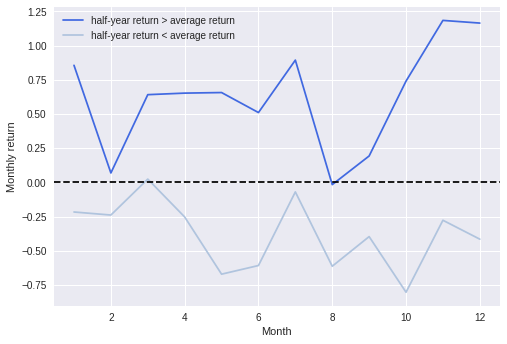

In [ ]:
plt.plot(df_up['Month'], df_up['Log_Rate'], label = 'half-year return > average return', color = 'royalblue')
plt.plot(df_down['Month'], df_down['Log_Rate'], label = 'half-year return < average return', color = 'lightsteelblue')
plt.ylabel('Monthly return')
plt.xlabel('Month')
plt.grid(visible=True, axis = 'y')
plt.axhline(0, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

##7월 첫날 주가 100으로 인덱스, 상반기 수익 굿

In [ ]:
first_days = list(data1_up[data1_up['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1982-07-01 00:00:00'),
 Timestamp('1984-07-02 00:00:00'),
 Timestamp('1985-07-01 00:00:00'),
 Timestamp('1986-07-01 00:00:00'),
 Timestamp('1987-07-01 00:00:00'),
 Timestamp('1988-07-01 00:00:00'),
 Timestamp('1989-07-01 00:00:00'),
 Timestamp('1992-07-01 00:00:00'),
 Timestamp('1993-07-01 00:00:00'),
 Timestamp('1994-07-01 00:00:00'),
 Timestamp('1998-07-01 00:00:00'),
 Timestamp('1999-07-01 00:00:00'),
 Timestamp('2001-07-02 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2005-07-01 00:00:00'),
 Timestamp('2006-07-03 00:00:00'),
 Timestamp('2007-07-02 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2012-07-02 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00')]

In [ ]:
df_up = data1_up[(data1_up['Month'] == 7) | (data1_up['Date'].isin(first_days) == True)]
df_up

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047


In [ ]:
temp = []
for i, x in enumerate(df_up['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Log_Rate'])))

print(temp)
print(len(temp))
df_up['July'] = temp
df_up

[100, 102.48434686990728, 101.76451682645207, 98.65881532354386, 95.97740913894755, 98.14399730583415, 97.79748989421061, 97.75630333226509, 98.03591270210427, 98.45502826963263, 98.68535177608945, 99.22739984469591, 99.33440132310669, 100.30144628071146, 100.1118638382358, 99.11044718627072, 98.6068654707974, 99.59822696144091, 100.10742985763697, 100.70670528535335, 100.70670528535335, 100.73963480589046, 101.853243669491, 101.86970879136155, 102.77136160131724, 102.97697841513647, 100, 100.28360115585888, 101.45875343880981, 99.93535494508664, 101.70012925292946, 103.12498298992406, 102.32394839764896, 101.77005453444677, 101.3472132840882, 100.73930516709324, 101.74693562457166, 101.78528583256575, 100.72107661955783, 101.18029205007645, 101.83785539495072, 102.28179413727375, 102.69517819548382, 103.73312878471283, 103.57192730893921, 103.52589534048862, 103.87812875614227, 103.77068978360768, 103.40956081081056, 103.50156220550075, 103.19429891852013, 100, 100.03653501922192, 99.

<ipython-input-227-fcf15059df5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361,100.000000
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361,102.484347
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361,101.764517
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361,98.658815
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361,95.977409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047,104.165126
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047,104.566073
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047,104.677385
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047,105.529345


In [ ]:
temp = []
for i in df_up['Year'].unique():
  # print(i)
  for j in np.arange(len(df_up[df_up['Year']==i])):
    temp.append(j)
df_up['July_num'] = temp
df_up

<ipython-input-228-54cb57226797>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July,July_num
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361,100.000000,0
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361,102.484347,1
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361,101.764517,2
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361,98.658815,3
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361,95.977409,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047,104.165126,16
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047,104.566073,17
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047,104.677385,18
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047,105.529345,19


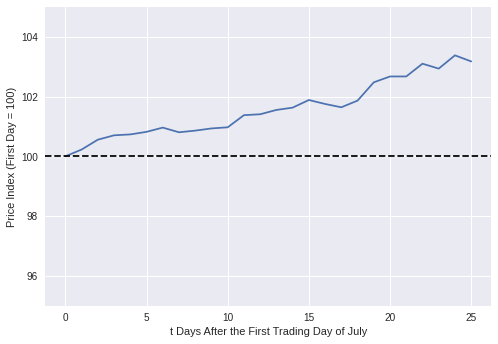

In [ ]:
df1 = pd.DataFrame(df_up.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df1['July_num'], df1['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

##7월 첫날 주가 100으로 인덱스, 상반기 수익 배드

In [ ]:
first_days = list(data1_down[data1_down['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1981-07-01 00:00:00'),
 Timestamp('1983-07-01 00:00:00'),
 Timestamp('1990-07-02 00:00:00'),
 Timestamp('1991-07-01 00:00:00'),
 Timestamp('1995-07-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('2000-07-03 00:00:00'),
 Timestamp('2002-07-02 00:00:00'),
 Timestamp('2008-07-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2021-07-01 00:00:00')]

In [ ]:
df_down = data1_down[(data1_down['Month'] == 7) | (data1_down['Date'].isin(first_days) == True)]
df_down

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782


In [ ]:
temp = []
for i, x in enumerate(df_down['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Change'])))

print(temp)
print(len(temp))
df_down['July'] = temp
df_down

[100, 99.1, 99.54594999999999, 100.889820325, 102.86726080337, 106.0664326143548, 104.2739099031722, 104.72228771575584, 102.22989726812085, 102.48547201129115, 101.20440361115001, 99.60537403409384, 99.09738662651996, 99.67215146895379, 101.46625019539495, 99.22384606607673, 99.41237137360228, 97.8814208544488, 95.90421615318894, 94.49442417573705, 95.514963956835, 93.91986405875585, 92.323226369757, 93.02488289016715, 94.29932378576244, 94.68595101328407, 100, 99.67, 99.101881, 99.46855795970001, 99.72717621039521, 99.78701251612145, 99.72714030861178, 100.01634901550675, 99.72630160336178, 98.9883269714969, 98.81014798294821, 99.27455567846806, 99.37383023414652, 99.51295359647433, 100.71706033499167, 100.87820763152766, 100.38390441413317, 101.0163230119422, 101.13754259955654, 101.33981768475566, 101.24861184883937, 101.18786268173007, 101.07655603278016, 101.59204646854735, 102.0288922683621, 102.07990671449627, 100, 104.47, 103.101443, 101.3899590462, 100.41661543935648, 100.024

<ipython-input-232-406e7b396ad6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470,100.000000
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470,99.100000
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470,99.545950
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470,100.889820
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470,102.867261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782,98.274706
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782,98.510565
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782,98.638629
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782,98.816179


In [ ]:
temp = []
for i in df_down['Year'].unique():
  # print(i)
  for j in np.arange(len(df_down[df_down['Year']==i])):
    temp.append(j)
df_down['July_num'] = temp
df_down

<ipython-input-233-3470d03ad51e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July,July_num
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470,100.000000,0
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470,99.100000,1
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470,99.545950,2
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470,100.889820,3
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470,102.867261,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782,98.274706,17
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782,98.510565,18
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782,98.638629,19
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782,98.816179,20


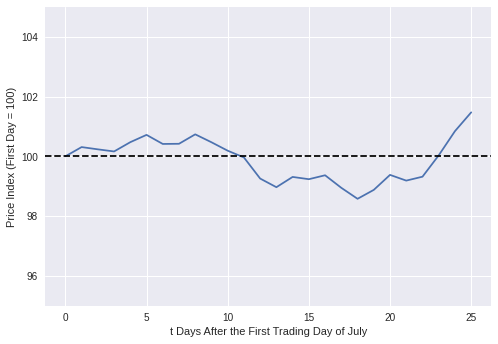

In [ ]:
df2 = pd.DataFrame(df_down.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df2['July_num'], df2['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

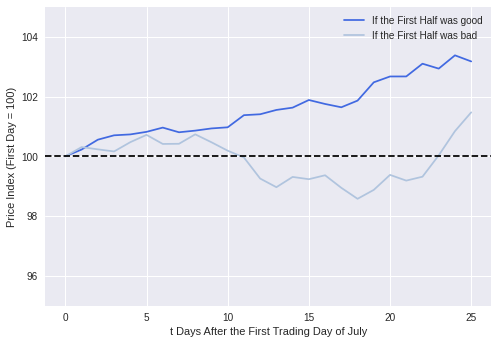

In [ ]:
plt.plot(df1['July_num'], df1['July'],label = 'If the First Half was good', color = 'royalblue')
plt.plot(df2['July_num'], df2['July'], label = 'If the First Half was bad', color = 'lightsteelblue')
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

##첫 6개월의 수익률이 플러스일 때 서머랠리가 더 잘 나타날까

In [ ]:
data

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981,True
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981,True
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981,True
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981,True
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022,False
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022,False
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022,False
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022,False


In [ ]:
data['Half'] = data['Month'] <= 6

In [ ]:
data_temp = pd.DataFrame(data.groupby(['Year', 'Half'])['Log_Rate'].sum()).reset_index()
data_temp.columns = ['Year', 'Half', 'Half_Rate']
data1 = pd.merge(data, data_temp, on = ['Year', 'Half'], how = 'left')
data1

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981,True,0.198904
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981,True,0.198904
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981,True,0.198904
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981,True,0.198904
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981,True,0.198904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022,False,0.058047
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022,False,0.058047
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022,False,0.058047
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022,False,0.058047


In [ ]:
data1_up = data1[data1['Half_Rate'] >= 0]
data1_down = data1[data1['Half_Rate'] <= 0]

In [ ]:
df_up = pd.DataFrame(data1_up.groupby('Month')['Log_Rate'].sum()).reset_index()
df_down = pd.DataFrame(data1_down.groupby('Month')['Log_Rate'].sum()).reset_index()

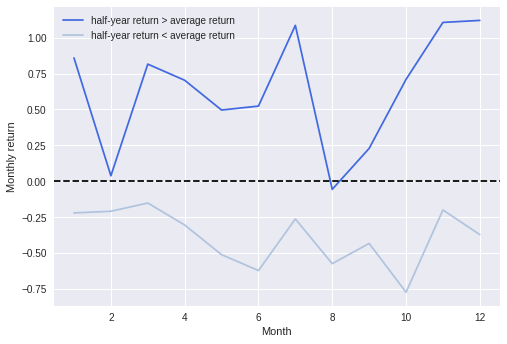

In [ ]:
plt.plot(df_up['Month'], df_up['Log_Rate'], label = 'half-year return > average return', color = 'royalblue')
plt.plot(df_down['Month'], df_down['Log_Rate'], label = 'half-year return < average return', color = 'lightsteelblue')
plt.ylabel('Monthly return')
plt.xlabel('Month')
plt.grid(visible=True, axis = 'y')
plt.axhline(0, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

##7월 첫날 주가 100으로 인덱스, 상반기 수익 플러스

In [ ]:
first_days = list(data1_up[data1_up['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1982-07-01 00:00:00'),
 Timestamp('1984-07-02 00:00:00'),
 Timestamp('1985-07-01 00:00:00'),
 Timestamp('1986-07-01 00:00:00'),
 Timestamp('1987-07-01 00:00:00'),
 Timestamp('1988-07-01 00:00:00'),
 Timestamp('1989-07-01 00:00:00'),
 Timestamp('1991-07-01 00:00:00'),
 Timestamp('1992-07-01 00:00:00'),
 Timestamp('1993-07-01 00:00:00'),
 Timestamp('1994-07-01 00:00:00'),
 Timestamp('1998-07-01 00:00:00'),
 Timestamp('1999-07-01 00:00:00'),
 Timestamp('2001-07-02 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2005-07-01 00:00:00'),
 Timestamp('2006-07-03 00:00:00'),
 Timestamp('2007-07-02 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2012-07-02 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00')]

In [ ]:
df_up = data1_up[(data1_up['Month'] == 7) | (data1_up['Date'].isin(first_days) == True)]
df_up

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047


In [ ]:
temp = []
for i, x in enumerate(df_up['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Log_Rate'])))

print(temp)
print(len(temp))
df_up['July'] = temp
df_up

[100, 102.48434686990728, 101.76451682645207, 98.65881532354386, 95.97740913894755, 98.14399730583415, 97.79748989421061, 97.75630333226509, 98.03591270210427, 98.45502826963263, 98.68535177608945, 99.22739984469591, 99.33440132310669, 100.30144628071146, 100.1118638382358, 99.11044718627072, 98.6068654707974, 99.59822696144091, 100.10742985763697, 100.70670528535335, 100.70670528535335, 100.73963480589046, 101.853243669491, 101.86970879136155, 102.77136160131724, 102.97697841513647, 100, 100.28360115585888, 101.45875343880981, 99.93535494508664, 101.70012925292946, 103.12498298992406, 102.32394839764896, 101.77005453444677, 101.3472132840882, 100.73930516709324, 101.74693562457166, 101.78528583256575, 100.72107661955783, 101.18029205007645, 101.83785539495072, 102.28179413727375, 102.69517819548382, 103.73312878471283, 103.57192730893921, 103.52589534048862, 103.87812875614227, 103.77068978360768, 103.40956081081056, 103.50156220550075, 103.19429891852013, 100, 100.03653501922192, 99.

<ipython-input-273-fcf15059df5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361,100.000000
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361,102.484347
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361,101.764517
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361,98.658815
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361,95.977409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047,104.165126
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047,104.566073
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047,104.677385
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047,105.529345


In [ ]:
temp = []
for i in df_up['Year'].unique():
  # print(i)
  for j in np.arange(len(df_up[df_up['Year']==i])):
    temp.append(j)
df_up['July_num'] = temp
df_up

<ipython-input-274-54cb57226797>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July,July_num
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361,100.000000,0
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361,102.484347,1
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361,101.764517,2
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361,98.658815,3
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361,95.977409,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047,104.165126,16
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047,104.566073,17
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047,104.677385,18
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047,105.529345,19


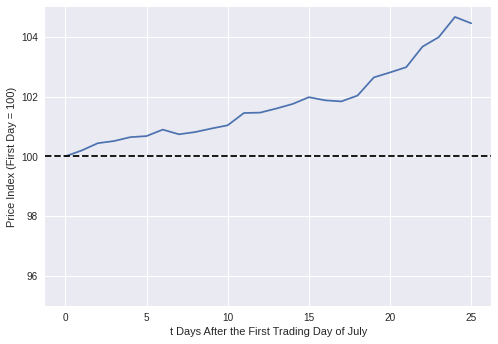

In [ ]:
df1 = pd.DataFrame(df_up.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df1['July_num'], df1['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

##7월 첫날 주가 100으로 인덱스, 상반기 수익 배드

In [ ]:
first_days = list(data1_down[data1_down['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1981-07-01 00:00:00'),
 Timestamp('1983-07-01 00:00:00'),
 Timestamp('1990-07-02 00:00:00'),
 Timestamp('1995-07-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('2000-07-03 00:00:00'),
 Timestamp('2002-07-02 00:00:00'),
 Timestamp('2008-07-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2021-07-01 00:00:00')]

In [ ]:
df_down = data1_down[(data1_down['Month'] == 7) | (data1_down['Date'].isin(first_days) == True)]
df_down

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782


In [ ]:
temp = []
for i, x in enumerate(df_down['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Change'])))

print(temp)
print(len(temp))
df_down['July'] = temp
df_down

[100, 99.1, 99.54594999999999, 100.889820325, 102.86726080337, 106.0664326143548, 104.2739099031722, 104.72228771575584, 102.22989726812085, 102.48547201129115, 101.20440361115001, 99.60537403409384, 99.09738662651996, 99.67215146895379, 101.46625019539495, 99.22384606607673, 99.41237137360228, 97.8814208544488, 95.90421615318894, 94.49442417573705, 95.514963956835, 93.91986405875585, 92.323226369757, 93.02488289016715, 94.29932378576244, 94.68595101328407, 100, 99.67, 99.101881, 99.46855795970001, 99.72717621039521, 99.78701251612145, 99.72714030861178, 100.01634901550675, 99.72630160336178, 98.9883269714969, 98.81014798294821, 99.27455567846806, 99.37383023414652, 99.51295359647433, 100.71706033499167, 100.87820763152766, 100.38390441413317, 101.0163230119422, 101.13754259955654, 101.33981768475566, 101.24861184883937, 101.18786268173007, 101.07655603278016, 101.59204646854735, 102.0288922683621, 102.07990671449627, 100, 104.47, 103.101443, 101.3899590462, 100.41661543935648, 100.024

<ipython-input-278-406e7b396ad6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470,100.000000
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470,99.100000
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470,99.545950
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470,100.889820
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470,102.867261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782,98.274706
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782,98.510565
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782,98.638629
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782,98.816179


In [ ]:
temp = []
for i in df_down['Year'].unique():
  # print(i)
  for j in np.arange(len(df_down[df_down['Year']==i])):
    temp.append(j)
df_down['July_num'] = temp
df_down

<ipython-input-279-3470d03ad51e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July,July_num
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470,100.000000,0
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470,99.100000,1
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470,99.545950,2
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470,100.889820,3
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470,102.867261,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782,98.274706,17
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782,98.510565,18
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782,98.638629,19
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782,98.816179,20


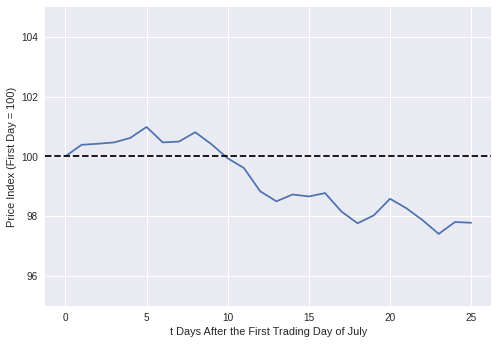

In [ ]:
df2 = pd.DataFrame(df_down.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df2['July_num'], df2['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

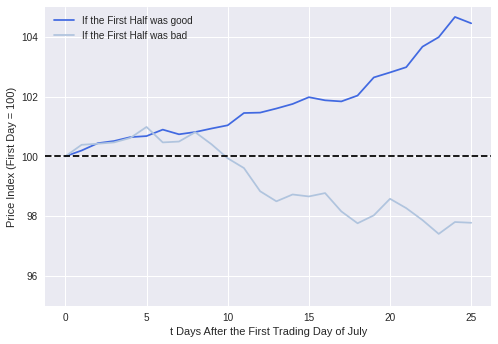

In [ ]:
plt.plot(df1['July_num'], df1['July'],label = 'If the First Half was good', color = 'royalblue')
plt.plot(df2['July_num'], df2['July'], label = 'If the First Half was bad', color = 'lightsteelblue')
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

In [ ]:
print(len(data1_up)) #상반기 수익률이 플러스인 경우
print(len(data1_down)) #마이너스인 경우

6592
4432


In [ ]:
len(data1_up['Year'].unique())

34

In [ ]:
data1_up['Year'].unique()

array([1981, 1982, 1984, 1985, 1986, 1987, 1988, 1989, 1991, 1992, 1993,
       1994, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2019, 2020, 2021,
       2022])

In [ ]:
len(data1_down['Year'].unique())

25

In [ ]:
data1_down['Year'].unique()

array([1981, 1982, 1983, 1985, 1989, 1990, 1991, 1992, 1995, 1996, 1997,
       1998, 2000, 2002, 2004, 2006, 2008, 2011, 2013, 2014, 2015, 2018,
       2020, 2021, 2022])

In [ ]:
len(data['Year'].unique())

42

In [ ]:
len(df_up['Year'].unique())

28

In [ ]:
len(df_down['Year'].unique())

14